In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import cv2

In [4]:
gImg = r'C:\Users\Gadhiya\OneDrive\Desktop\ComputerVision\grayImg1.jpg'

In [5]:
gImg = plt.imread(gImg)

In [6]:
gImgAffine = r'C:\Users\Gadhiya\OneDrive\Desktop\ComputerVision\gImg_affine.jpg'

In [7]:
gImgAffine = plt.imread(gImgAffine)

In [8]:
gImgProjective = r'C:\Users\Gadhiya\OneDrive\Desktop\ComputerVision\gImg_projective.jpg'

In [9]:
gImgProjective = plt.imread(gImgProjective)

In [10]:
cImg = r'C:\Users\Gadhiya\OneDrive\Desktop\ComputerVision\colorImg1.jpg'

In [11]:
cImg = plt.imread(cImg)

In [12]:
def bilinearInter(row, col, I):
    lc = int(col)
    rc = lc+1
    wr = (col-lc)
    wl = (rc-col)
    tr = int(row)
    br = tr+1
    wt = (row-tr)
    wb = (br-row)
    if tr>=0 and br<I.shape[0] and lc>=0 and rc<I.shape[1]:
        a = I[tr,lc]*wl+I[tr,rc]*wr
        b = I[br,lc]*wl+I[br,rc]*wr
        intensity = a*wt+b*wb
        return intensity
    return 0

In [13]:
def displayImgInOriginalSize(I):
    dpi = mpl.rcParams['figure.dpi']      # dpi = dots per inch
    H,W = I.shape
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(I, cmap='gray')
    plt.show()

def getExtentsProjective(T, rMax, cMax):
    cords = np.array([[0,0,1],
                      [0,cMax-1,1],
                      [rMax-1,0,1],
                      [rMax-1,cMax-1,1]])
    cordsDash = T.dot(cords.T)
    cordsDash /= cordsDash[2,:]

    mins = np.int64(np.floor(cordsDash.min(axis=1)))
    maxs = np.int64(np.ceil(cordsDash.max(axis=1)))

    minR = mins[0]
    minC = mins[1]
    maxR = maxs[0]
    maxC = maxs[1]

    height,width = maxR-minR+1, maxC-minC+1
    return minR,minC,maxR,maxC,height,width

def transformProjective(T, gImg):
    minR,minC,maxR,maxC,height,width = getExtentsProjective(T, gImg.shape[0], gImg.shape[1])
    Tinv = np.linalg.inv(T)
    I2 = np.zeros((height,width), dtype='uint8')

    for newi in range(minR,maxR):
        for newj in range(minC,maxC):
            Pdash = np.array([newi,newj,1])    
            P = Tinv.dot(Pdash)
            P /= P[2]
            i,j = P[0],P[1]
            if i<0 or i>=gImg.shape[0] or j<0 or j>=gImg.shape[1]:      # only to avoid error         
                pass
            else:
                g = bilinearInter(i, j, gImg)
                I2[newi-minR,newj-minC] = int(g)
    return I2

In [14]:
def getPoints(I, numPts):
    %matplotlib
    fig,ax = plt.subplots(1, figsize=(15,30))
    plt.imshow(I, cmap='gray')
    pts = np.round(np.array(plt.ginput(n=numPts)))
    pts = pts[:,[1,0]].T
    plt.close()
    return pts

In [15]:
P = getPoints(gImg, 3)

Using matplotlib backend: Qt5Agg


In [16]:
P

array([[ 76.,  72., 105.],
       [113., 149., 134.]])

In [17]:
P = np.vstack((P,np.ones((1,3))))
P

array([[ 76.,  72., 105.],
       [113., 149., 134.],
       [  1.,   1.,   1.]])

In [18]:
Pdash = getPoints(gImgAffine, 3)

Using matplotlib backend: Qt5Agg


In [19]:
Pdash

array([[148., 126., 157.],
       [136., 164., 167.]])

In [20]:
Pdash = np.vstack((Pdash,np.ones((1,3))))
Pdash

array([[148., 126., 157.],
       [136., 164., 167.],
       [  1.,   1.,   1.]])

In [21]:
A = Pdash.dot(np.linalg.inv(P))
A

array([[ 6.96808511e-01, -5.33687943e-01,  1.55349291e+02],
       [ 4.68085106e-01,  8.29787234e-01,  6.65957447e+00],
       [ 0.00000000e+00,  1.30104261e-18,  1.00000000e+00]])

In [22]:
imgx = transformProjective(A, gImg[:,:,0])
plt.imshow(imgx, cmap='gray')

---
### 127 - Affine transformation Estimation with more than 3 Points Implementation
---

In [23]:
P = getPoints(gImg, 5)

Using matplotlib backend: Qt5Agg


In [24]:
P = np.vstack((P,np.ones((1,5))))
P

array([[ 80.,  76., 102.,  96., 107.],
       [117., 151., 134., 162., 154.],
       [  1.,   1.,   1.,   1.,   1.]])

In [25]:
Pdash = getPoints(gImgAffine, 5)

Using matplotlib backend: Qt5Agg


In [26]:
Pdash = np.vstack((Pdash,np.ones((1,5))))
Pdash

array([[148., 127., 159., 135., 155.],
       [145., 164., 164., 183., 188.],
       [  1.,   1.,   1.,   1.,   1.]])

In [27]:
A = Pdash.dot(P.T).dot(np.linalg.inv(P.dot(P.T)))
A

array([[ 9.34608574e-01, -5.68654402e-01,  1.40287862e+02],
       [ 5.73136475e-01,  7.01616325e-01,  1.52047127e+01],
       [ 1.11022302e-16, -6.93889390e-17,  1.00000000e+00]])

In [28]:
imgx = transformProjective(A, gImg[:,:,0])

In [29]:
plt.figure(1)
plt.subplot(121)
plt.imshow(gImgAffine, cmap='gray')
plt.subplot(122)
plt.imshow(imgx, cmap='gray')
plt.show()

---
### 132 - Projective Transformation Estimation
---

In [30]:
P = getPoints(gImg, 3)

Using matplotlib backend: Qt5Agg


In [31]:
P = np.vstack((P,np.ones((1,3))))
P

array([[ 82.,  78., 108.],
       [117., 152., 120.],
       [  1.,   1.,   1.]])

In [32]:
Pdash = getPoints(gImgProjective, 3)

Using matplotlib backend: Qt5Agg


In [33]:
Pdash = np.vstack((Pdash,np.ones((1,3))))
Pdash

array([[ 75.,  67.,  88.],
       [ 91., 113.,  94.],
       [  1.,   1.,   1.]])

In [34]:
H = Pdash.dot(np.linalg.inv(P))
H

array([[ 5.19522777e-01, -1.69197397e-01,  5.21952278e+01],
       [ 4.22993492e-02,  6.33405640e-01,  1.34229935e+01],
       [ 0.00000000e+00,  6.93889390e-18,  1.00000000e+00]])

In [35]:
imgx = transformProjective(H, gImg[:,:,0])

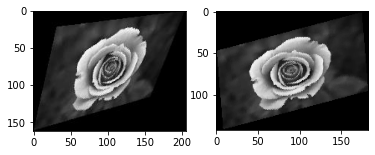

In [36]:
%matplotlib inline
plt.figure(1)
plt.subplot(121)
plt.imshow(gImgProjective, cmap='gray')
plt.subplot(122)
plt.imshow(imgx, cmap='gray')
plt.show()

---
### 137 - DLT  Nullspace implementation
---

In [37]:
def computeRightNullSpace(A):
    B = A.T.dot(A)
    w,v = np.linalg.eig(B)
    idx = np.argmin(w)
    nullVector = v[:,idx]
    return nullVector

---
### 138 - DLT implementation
---

In [38]:
P = getPoints(gImg, 4)

Using matplotlib backend: Qt5Agg


In [39]:
P = np.vstack((P,np.ones((1,4))))
P

array([[  2.,   2., 181., 179.],
       [  2., 272., 271.,   2.],
       [  1.,   1.,   1.,   1.]])

In [40]:
Pdash = getPoints(gImgProjective, 4)

Using matplotlib backend: Qt5Agg


In [41]:
Pdash = np.vstack((Pdash,np.ones((1,4))))
Pdash

array([[ 23.,   1., 113., 159.],
       [ 33., 201., 155.,   2.],
       [  1.,   1.,   1.,   1.]])

In [42]:
A = np.zeros((8,9))

In [43]:
A[::2,:3] = -P.T

In [44]:
A[1::2,3:6] = -P.T

In [45]:
A[::2,6:] = P.dot(np.diag(Pdash[0,:])).T
A[1::2,6:] = P.dot(np.diag(Pdash[1,:])).T
A

array([[-2.0000e+00, -2.0000e+00, -1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  4.6000e+01,  4.6000e+01,  2.3000e+01],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -2.0000e+00, -2.0000e+00,
        -1.0000e+00,  6.6000e+01,  6.6000e+01,  3.3000e+01],
       [-2.0000e+00, -2.7200e+02, -1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  2.0000e+00,  2.7200e+02,  1.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -2.0000e+00, -2.7200e+02,
        -1.0000e+00,  4.0200e+02,  5.4672e+04,  2.0100e+02],
       [-1.8100e+02, -2.7100e+02, -1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  2.0453e+04,  3.0623e+04,  1.1300e+02],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -1.8100e+02, -2.7100e+02,
        -1.0000e+00,  2.8055e+04,  4.2005e+04,  1.5500e+02],
       [-1.7900e+02, -2.0000e+00, -1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  2.8461e+04,  3.1800e+02,  1.5900e+02],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -1.7900e+02, -2

In [46]:
H = computeRightNullSpace(A)
H

array([-2.43826703e-02,  2.10446976e-03, -5.57830604e-01,  4.53350994e-03,
       -2.22441473e-02, -8.28873124e-01, -2.67843546e-05, -2.95904838e-05,
       -2.60779897e-02])

In [47]:
H = np.reshape(H, (3,3))

In [48]:
H

array([[-2.43826703e-02,  2.10446976e-03, -5.57830604e-01],
       [ 4.53350994e-03, -2.22441473e-02, -8.28873124e-01],
       [-2.67843546e-05, -2.95904838e-05, -2.60779897e-02]])

In [49]:
imgx = transformProjective(H, cImg[:,:,0])

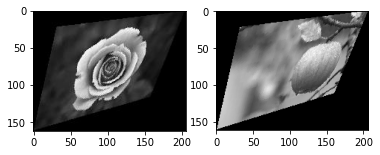

In [50]:
%matplotlib inline
plt.figure(1)
plt.subplot(121)
plt.imshow(gImgProjective, cmap='gray')
plt.subplot(122)
plt.imshow(imgx, cmap='gray')
plt.show()

---
### Panorama Stitching
---

In [51]:
pano1 = r'C:\Users\Gadhiya\OneDrive\Desktop\ComputerVision\pano1.jpg'
pano2 = r'C:\Users\Gadhiya\OneDrive\Desktop\ComputerVision\pano2.jpg'
pano3 = r'C:\Users\Gadhiya\OneDrive\Desktop\ComputerVision\pano3.jpg'

In [52]:
pano1 = plt.imread(pano1)
pano2 = plt.imread(pano2)
pano3 = plt.imread(pano3)

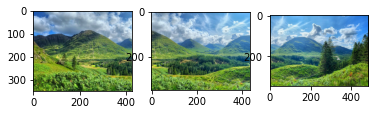

In [58]:
plt.figure(1)
plt.subplot(131)
plt.imshow(pano1)
plt.subplot(132)
plt.imshow(pano2)
plt.subplot(133)
plt.imshow(pano3)
plt.show()

In [59]:
imgs = []
imgs.append(pano1)
imgs.append(pano2)
imgs.append(pano3)

In [60]:
M = cv2.Stitcher.create(cv2.Stitcher_PANORAMA)
status,pano = M.stitch(imgs)

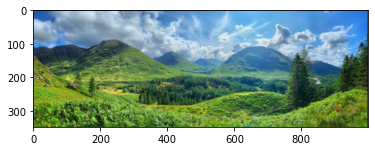

In [61]:
plt.imshow(pano)